In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr


In [2]:
def calc_trac_transport_CS(flux_component, x_slice, y_slice, t_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux3D04.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    t_slice : time slice to select
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Yp1=y_slice, X=x_slice, T=t_slice)).sum(dim=dim_name)

def calc_trac_transport_vert(flux_component, x_slice, y_slice,z_ind, t_slice, dim_name):
    '''
    INPUT:
    flux_component: xarray, flux component perpendicular to cross section (e.g. unstagger_xarray(flux3D04.V,'Yp1'))
    x_slice : slice or index of cross-section in alongshore direction
    y_slice : slice or index of cross-section in cross-shore direction
    t_slice : time slice to select
    dim_name: str, name of the dimension along which to sum.
    
    '''
    return (flux_component.isel(Y=y_slice, X=x_slice,Zld000090 =z_ind, T=t_slice)).sum(dim=dim_name)


def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty

def fig_looks(ax, title = 'Cross-shelf transport'):
    '''define aesthetics of transport plots'''
    sns.set_style(style='whitegrid')
    sns.set_context('talk')

    ax.set_ylabel('tracer transport [$Mol/l.m^3s^{-1}$]')
    ax.set_xlabel('Time [$s$]')
    ax.legend(loc=0)
    ax.set_title(title)
    
    return(ax)
    

In [3]:
grid_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_file_NoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc'

grid = xr.open_dataset(grid_file)
grid_NoC = xr.open_dataset(grid_file_NoC)

## 
flux_file38 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
flux_file42 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

flux_file37 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run37/FluxTR01Glob.nc'
flux_file36 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run36/FluxTR01Glob.nc'
flux_file44 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run44/FluxTR01Glob.nc'
flux_file45 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run45/FluxTR01Glob.nc'
flux_file46 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run46/FluxTR01Glob.nc'
flux_file43 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run43/FluxTR01Glob.nc'
flux_file45 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run45/FluxTR01Glob.nc'
flux_file48 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run48/FluxTR01Glob.nc'

flux_file51 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run51/FluxTR01Glob.nc'
flux_file52 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run52/FluxTR01Glob.nc'

flux_file53 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run53/FluxTR01Glob.nc'
flux_file41 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run41/FluxTR01Glob.nc'
flux_file40 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run40/FluxTR01Glob.nc'
flux_file47 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run47/FluxTR01Glob.nc'
flux_file48 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run48/FluxTR01Glob.nc'
flux_file49 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run49/FluxTR01Glob.nc'
flux_file50 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run50/FluxTR01Glob.nc'
flux_file54 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run54/FluxTR01Glob.nc'

flux_file55 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run55/FluxTR01Glob.nc'
flux_file56 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run56/FluxTR01Glob.nc'
flux_file57 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run57/FluxTR01Glob.nc'
flux_file58 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run58/FluxTR01Glob.nc'
flux_file59 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run59/FluxTR01Glob.nc'
flux_file60 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run60/FluxTR01Glob.nc'

flux_file61 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run61/FluxTR01Glob.nc'
flux_file62 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run62/FluxTR01Glob.nc'
flux_file63 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run63/FluxTR01Glob.nc'
flux_file64 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run64/FluxTR01Glob.nc'
flux_file65 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run65/FluxTR01Glob.nc'
flux_file66 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run66/FluxTR01Glob.nc'

flux_file013D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run01/FluxTR01Glob.nc'
flux_file023D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run02/FluxTR01Glob.nc'
flux_file033D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run03/FluxTR01Glob.nc'
flux_file043D = '/ocean/kramosmu/MITgcm/TracerExperiments/3DVISC/run04/FluxTR01Glob.nc'

flux_file043DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/FluxTR01Glob.nc'
flux_file053DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run05/FluxTR01Glob.nc'
flux_file063DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/FluxTR01Glob.nc'
flux_file073DDiff = '/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run07/FluxTR01Glob.nc'

In [4]:
flux38 = xr.open_dataset(flux_file38) 
flux37 = xr.open_dataset(flux_file37)  
flux36 = xr.open_dataset(flux_file36)  
flux44 = xr.open_dataset(flux_file44)  
flux45 = xr.open_dataset(flux_file45)  
flux46 = xr.open_dataset(flux_file46)  
flux43 = xr.open_dataset(flux_file43)  
flux51 = xr.open_dataset(flux_file51)  
flux52 = xr.open_dataset(flux_file52)  

flux41 = xr.open_dataset(flux_file41)  
flux42 = xr.open_dataset(flux_file42)
flux40 = xr.open_dataset(flux_file40)  
flux47 = xr.open_dataset(flux_file47)  
flux48 = xr.open_dataset(flux_file48)  
flux49 = xr.open_dataset(flux_file49)  
flux50 = xr.open_dataset(flux_file50)  
flux53 = xr.open_dataset(flux_file53)  
flux54 = xr.open_dataset(flux_file54)  

flux55 = xr.open_dataset(flux_file55)  
flux56 = xr.open_dataset(flux_file56)  
flux57 = xr.open_dataset(flux_file57)  
flux58 = xr.open_dataset(flux_file58)  
flux59 = xr.open_dataset(flux_file59)  
flux60 = xr.open_dataset(flux_file60)  

flux61 = xr.open_dataset(flux_file61)  
flux62 = xr.open_dataset(flux_file62)  
flux63 = xr.open_dataset(flux_file63)  
flux64 = xr.open_dataset(flux_file64)  
flux65 = xr.open_dataset(flux_file65)  
flux66 = xr.open_dataset(flux_file66)  

flux013D = xr.open_dataset(flux_file013D) 
flux023D = xr.open_dataset(flux_file023D) 
flux033D = xr.open_dataset(flux_file033D) 
flux043D = xr.open_dataset(flux_file043D)

flux043DDiff = xr.open_dataset(flux_file043DDiff) 
flux053DDiff = xr.open_dataset(flux_file053DDiff) 
flux063DDiff = xr.open_dataset(flux_file063DDiff) 
flux073DDiff = xr.open_dataset(flux_file073DDiff)

In [5]:
CS_x_slice = slice(0, 359)
CS_y_ind = 227

vert_x_slice = slice(120, 240)
vert_y_slice= slice(227,267)
z_ind = 30
time_slice = slice(6,19) # advective phase

In [6]:
# base case
advCS_flux38 = calc_trac_transport_CS(unstagger_xarray(flux38.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux42 = calc_trac_transport_CS(unstagger_xarray(flux42.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')



In [7]:
# diffusivity and viscosity
advCS_flux36 = calc_trac_transport_CS(unstagger_xarray(flux36.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux37 = calc_trac_transport_CS(unstagger_xarray(flux37.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux43 = calc_trac_transport_CS(unstagger_xarray(flux43.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux013D = calc_trac_transport_CS(unstagger_xarray(flux013D.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux023D = calc_trac_transport_CS(unstagger_xarray(flux023D.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux033D = calc_trac_transport_CS(unstagger_xarray(flux033D.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux043D = calc_trac_transport_CS(unstagger_xarray(flux043D.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux40 = calc_trac_transport_CS(unstagger_xarray(flux40.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux41 = calc_trac_transport_CS(unstagger_xarray(flux41.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux50 = calc_trac_transport_CS(unstagger_xarray(flux50.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')



In [8]:
# diffusivity only 
advCS_flux61 = calc_trac_transport_CS(unstagger_xarray(flux61.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux62 = calc_trac_transport_CS(unstagger_xarray(flux62.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux63 = calc_trac_transport_CS(unstagger_xarray(flux63.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux043DDiff = calc_trac_transport_CS(unstagger_xarray(flux043DDiff.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux053DDiff = calc_trac_transport_CS(unstagger_xarray(flux053DDiff.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux063DDiff = calc_trac_transport_CS(unstagger_xarray(flux063DDiff.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux073DDiff = calc_trac_transport_CS(unstagger_xarray(flux073DDiff.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux64 = calc_trac_transport_CS(unstagger_xarray(flux64.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux65 = calc_trac_transport_CS(unstagger_xarray(flux65.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux66 = calc_trac_transport_CS(unstagger_xarray(flux66.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')



In [9]:
# Viscosity only
advCS_flux55 = calc_trac_transport_CS(unstagger_xarray(flux55.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux56 = calc_trac_transport_CS(unstagger_xarray(flux56.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux57 = calc_trac_transport_CS(unstagger_xarray(flux57.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux58 = calc_trac_transport_CS(unstagger_xarray(flux58.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux59 = calc_trac_transport_CS(unstagger_xarray(flux59.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux60 = calc_trac_transport_CS(unstagger_xarray(flux60.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')



In [10]:
# Burger number
advCS_flux44 = calc_trac_transport_CS(unstagger_xarray(flux44.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux45 = calc_trac_transport_CS(unstagger_xarray(flux45.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux46 = calc_trac_transport_CS(unstagger_xarray(flux46.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux51 = calc_trac_transport_CS(unstagger_xarray(flux51.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux52 = calc_trac_transport_CS(unstagger_xarray(flux52.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

advCS_flux47 = calc_trac_transport_CS(unstagger_xarray(flux47.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux48 = calc_trac_transport_CS(unstagger_xarray(flux48.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux49 = calc_trac_transport_CS(unstagger_xarray(flux49.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux53 = calc_trac_transport_CS(unstagger_xarray(flux53.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')
advCS_flux54 = calc_trac_transport_CS(unstagger_xarray(flux54.ADVyTr01,'Yp1'), CS_x_slice, CS_y_ind, time_slice, 'X').sum(dim='Zmd000090')

## Diffusivity only

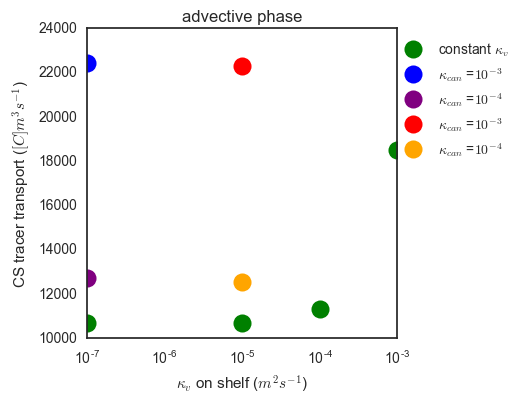

In [11]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advCS_flux61-advCS_flux64 ,advCS_flux38-advCS_flux42 ,advCS_flux62-advCS_flux65 ,advCS_flux63-advCS_flux66 ,
             advCS_flux043DDiff-advCS_flux64 ,advCS_flux053DDiff-advCS_flux64 ,
             advCS_flux063DDiff-advCS_flux42 ,advCS_flux073DDiff-advCS_flux42 ,
             ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
fig.savefig('advCS_transport_canyon_effect_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


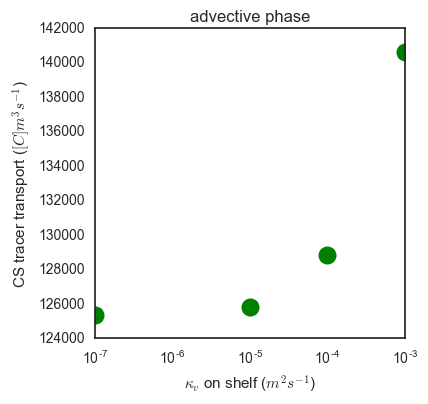

In [12]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$']

colors = ['green','green','green','green']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advCS_flux64 ,advCS_flux42 ,advCS_flux65 ,advCS_flux66]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

fig.savefig('advCS_transport_NoC_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


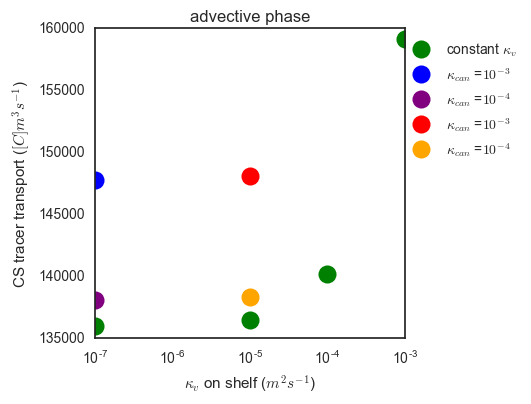

In [13]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advCS_flux61 ,advCS_flux38 ,advCS_flux62 ,advCS_flux63,
             advCS_flux043DDiff ,advCS_flux053DDiff,
             advCS_flux063DDiff ,advCS_flux073DDiff ,
             ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
fig.savefig('advCS_transport_canyon_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


## Diffusivity and viscosity

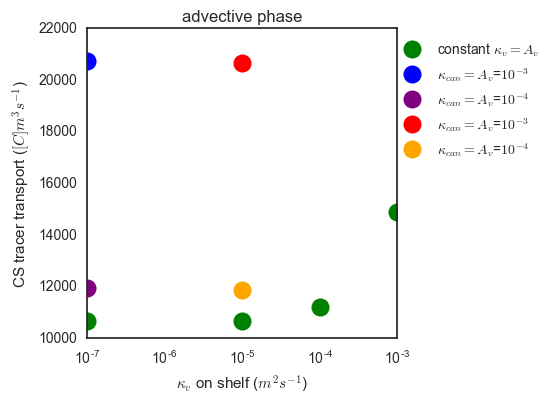

In [14]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v=A_v$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advCS_flux43-advCS_flux50 ,
              advCS_flux38-advCS_flux42 ,
              advCS_flux37-advCS_flux41 ,
              advCS_flux36-advCS_flux40,
              advCS_flux013D-advCS_flux50,
              advCS_flux023D-advCS_flux50,
              advCS_flux033D-advCS_flux42,
              advCS_flux043D-advCS_flux42 ,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
fig.savefig('advCS_transport_canyon_effect_Kv_and_Av.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


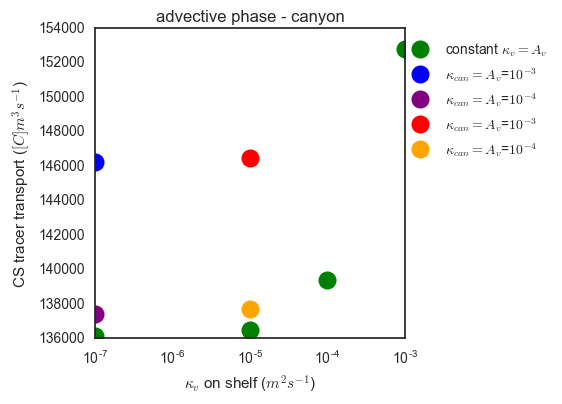

In [15]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v=A_v$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advCS_flux43,
              advCS_flux38,
              advCS_flux37,
              advCS_flux36,
              advCS_flux013D,
              advCS_flux023D,
              advCS_flux033D,
              advCS_flux043D,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - canyon')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
fig.savefig('advCS_transport_canyon_Kv_and_Av.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


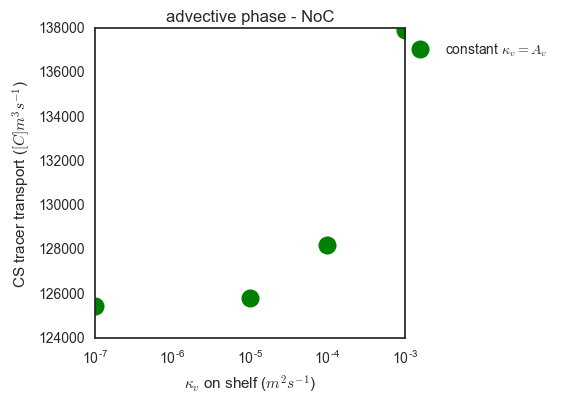

In [16]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v=A_v$']

colors = ['green','green','green','green']

kv = [1E-7,1E-5,1E-4,1E-3]

trans_list = [advCS_flux50,
              advCS_flux42,
              advCS_flux41,
              advCS_flux40,
             ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - NoC')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
fig.savefig('advCS_transport_NoC_Kv_and_Av.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


## Viscosity only

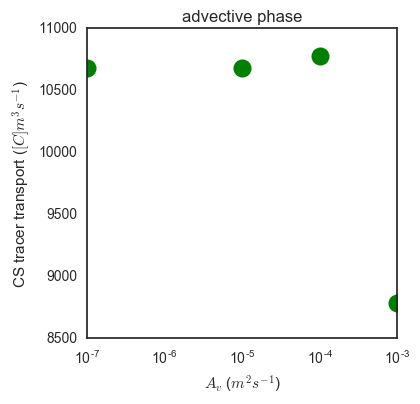

In [17]:
sns.set_context('notebook')
sns.set_style('white')


Av = [1E-7,1E-5,1E-4,1E-3]

trans_list = [advCS_flux55-advCS_flux58 ,
              advCS_flux38-advCS_flux42 ,
              advCS_flux56-advCS_flux59 ,
              advCS_flux57-advCS_flux60,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Av_num in zip(trans_list,Av):
    ax.plot(Av_num,trans[6:].mean(),'go', markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

fig.savefig('advCS_transport_canyon_effect_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


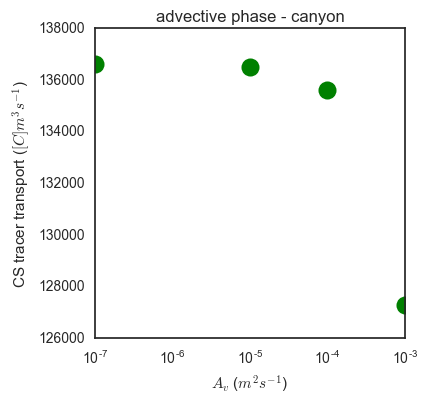

In [18]:
sns.set_context('notebook')
sns.set_style('white')


Av = [1E-7,1E-5,1E-4,1E-3]

trans_list = [advCS_flux55 ,
              advCS_flux38 ,
              advCS_flux56,
              advCS_flux57,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Av_num in zip(trans_list,Av):
    ax.plot(Av_num,trans[6:].mean(),'go', markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - canyon')

fig.savefig('advCS_transport_canyon_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


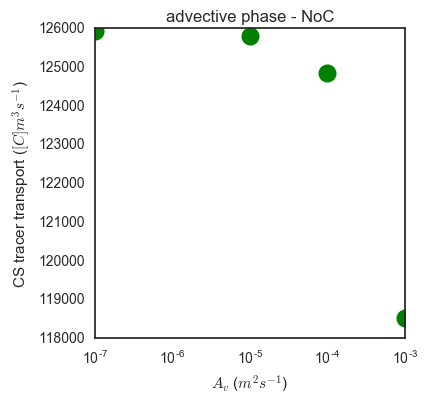

In [19]:
sns.set_context('notebook')
sns.set_style('white')


Av = [1E-7,1E-5,1E-4,1E-3]

trans_list = [advCS_flux58 ,
              advCS_flux42 ,
              advCS_flux59 ,
              advCS_flux60,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Av_num in zip(trans_list,Av):
    ax.plot(Av_num,trans[6:].mean(),'go', markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - NoC')

fig.savefig('advCS_transport_NoC_effect_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


## Bu

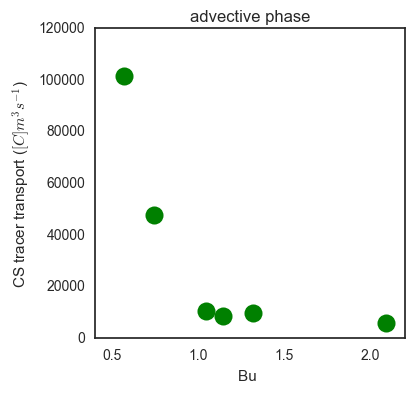

In [20]:
sns.set_context('notebook')
sns.set_style('white')

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

trans_list = [advCS_flux38-advCS_flux42 ,
              advCS_flux44-advCS_flux47 ,
              advCS_flux45-advCS_flux48 ,
              advCS_flux46-advCS_flux49 ,
              advCS_flux51-advCS_flux53,
              advCS_flux52-advCS_flux54,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Bu_num in zip(trans_list,Bu):
    ax.plot(Bu_num,trans[6:].mean(),'go', markersize=13)


ax.set_xlabel('Bu ')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

fig.savefig('advCS_transport_canyon_effect_Bu.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


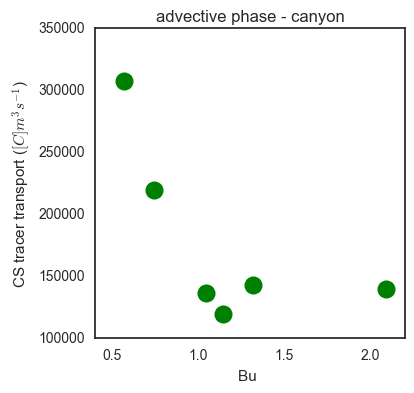

In [21]:
sns.set_context('notebook')
sns.set_style('white')

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

trans_list = [advCS_flux38 ,
              advCS_flux44 ,
              advCS_flux45 ,
              advCS_flux46,
              advCS_flux51,
              advCS_flux52,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Bu_num in zip(trans_list,Bu):
    ax.plot(Bu_num,trans[6:].mean(),'go', markersize=13)


ax.set_xlabel('Bu ')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - canyon')

fig.savefig('advCS_transport_canyon_Bu.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


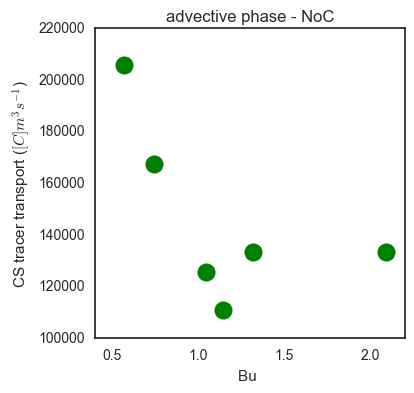

In [22]:
sns.set_context('notebook')
sns.set_style('white')

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

trans_list = [advCS_flux42 ,
              advCS_flux47 ,
              advCS_flux48 ,
              advCS_flux49,
              advCS_flux53,
              advCS_flux54,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Bu_num in zip(trans_list,Bu):
    ax.plot(Bu_num,trans[6:].mean(),'go', markersize=13)


ax.set_xlabel('Bu ')
ax.set_ylabel('CS tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase - NoC')

fig.savefig('advCS_transport_NoC_Bu.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


# Advective vertical transport

In [23]:
# base case
advVert_flux38 = calc_trac_transport_vert((flux38.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux42 = calc_trac_transport_vert((flux42.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity and viscosity
advVert_flux36 = calc_trac_transport_vert( (flux36.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux37 = calc_trac_transport_vert( (flux37.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux43 = calc_trac_transport_vert( (flux43.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux013D = calc_trac_transport_vert( (flux013D.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux023D = calc_trac_transport_vert( (flux023D.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux033D = calc_trac_transport_vert( (flux033D.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux043D = calc_trac_transport_vert( (flux043D.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux40 = calc_trac_transport_vert( (flux40.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux41 = calc_trac_transport_vert( (flux41.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux50 = calc_trac_transport_vert( (flux50.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity only 
advVert_flux61 = calc_trac_transport_vert( (flux61.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux62 = calc_trac_transport_vert( (flux62.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux63 = calc_trac_transport_vert( (flux63.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux043DDiff = calc_trac_transport_vert( (flux043DDiff.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux053DDiff = calc_trac_transport_vert( (flux053DDiff.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux063DDiff = calc_trac_transport_vert( (flux063DDiff.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux073DDiff = calc_trac_transport_vert( (flux073DDiff.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux64 = calc_trac_transport_vert( (flux64.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux65 = calc_trac_transport_vert( (flux65.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux66 = calc_trac_transport_vert( (flux66.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Viscosity only
advVert_flux55 = calc_trac_transport_vert( (flux55.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux56 = calc_trac_transport_vert( (flux56.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux57 = calc_trac_transport_vert( (flux57.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux58 = calc_trac_transport_vert( (flux58.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux59 = calc_trac_transport_vert( (flux59.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux60 = calc_trac_transport_vert( (flux60.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Burger number
advVert_flux44 = calc_trac_transport_vert( (flux44.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux45 = calc_trac_transport_vert( (flux45.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux46 = calc_trac_transport_vert( (flux46.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux51 = calc_trac_transport_vert( (flux51.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux52 = calc_trac_transport_vert( (flux52.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

advVert_flux47 = calc_trac_transport_vert( (flux47.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux48 = calc_trac_transport_vert( (flux48.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux49 = calc_trac_transport_vert( (flux49.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux53 = calc_trac_transport_vert( (flux53.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
advVert_flux54 = calc_trac_transport_vert( (flux54.ADVrTr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

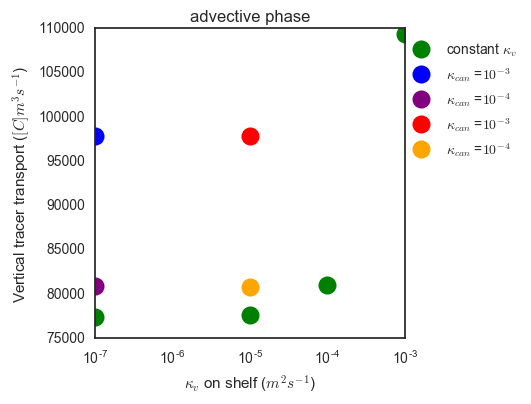

In [24]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advVert_flux61-advVert_flux64 ,advVert_flux38-advVert_flux42 ,advVert_flux62-advVert_flux65 ,advVert_flux63-advVert_flux66 ,
             advVert_flux043DDiff-advVert_flux64 ,advVert_flux053DDiff-advVert_flux64 ,
             advVert_flux063DDiff-advVert_flux42 ,advVert_flux073DDiff-advVert_flux42 ,
             ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
fig.savefig('advVert_transport_canyon_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


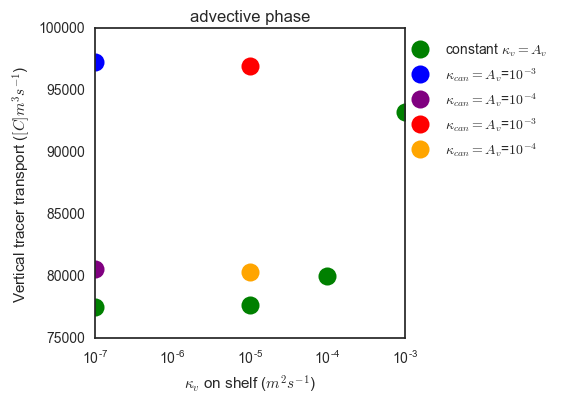

In [25]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v=A_v$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
          '$\kappa_{can}=A_v$=$10^{-3}$',
          '$\kappa_{can}=A_v$=$10^{-4}$',
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list = [advVert_flux43-advVert_flux50 ,
              advVert_flux38-advVert_flux42 ,
              advVert_flux37-advVert_flux41 ,
              advVert_flux36-advVert_flux40,
              advVert_flux013D-advVert_flux50,
              advVert_flux023D-advVert_flux50,
              advVert_flux033D-advVert_flux42,
              advVert_flux043D-advVert_flux42 ,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,lab,color,kv_num in zip(trans_list,labels,colors,kv):
    ax.plot(kv_num,trans[6:].mean(),'o',color=color,label=lab, markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
fig.savefig('advVert_transport_canyon_Kv_and_Av.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


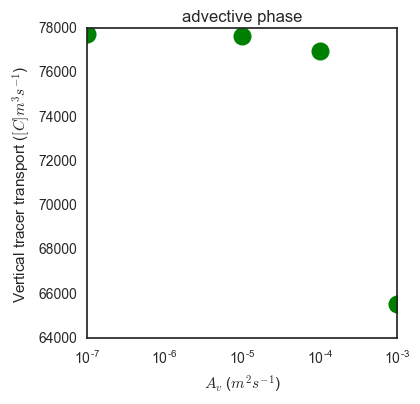

In [26]:
sns.set_context('notebook')
sns.set_style('white')


Av = [1E-7,1E-5,1E-4,1E-3]

trans_list = [advVert_flux55-advVert_flux58 ,
              advVert_flux38-advVert_flux42 ,
              advVert_flux56-advVert_flux59 ,
              advVert_flux57-advVert_flux60,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Av_num in zip(trans_list,Av):
    ax.plot(Av_num,trans[6:].mean(),'go', markersize=13)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

fig.savefig('advVert_transport_canyon_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


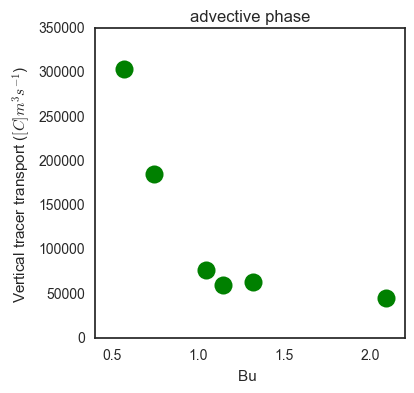

In [27]:
sns.set_context('notebook')
sns.set_style('white')

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

trans_list = [advVert_flux38-advVert_flux42 ,
              advVert_flux44-advVert_flux47 ,
              advVert_flux45-advVert_flux48 ,
              advVert_flux46-advVert_flux49 ,
              advVert_flux51-advVert_flux53 ,
              advVert_flux52-advVert_flux54,
              ]

fig,ax = plt.subplots(1,1,figsize=(4,4))
for trans,Bu_num in zip(trans_list,Bu):
    ax.plot(Bu_num,trans[6:].mean(),'go', markersize=13)


ax.set_xlabel('Bu ')
ax.set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax.set_title('advective phase')

fig.savefig('advVert_transport_canyon_Bu.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


# Diffusive vertical transport

In [28]:
# base case
diff_ImVert_flux38 = calc_trac_transport_vert((flux38.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux42 = calc_trac_transport_vert((flux42.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity and viscosity
diff_ImVert_flux36 = calc_trac_transport_vert( (flux36.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux37 = calc_trac_transport_vert( (flux37.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux43 = calc_trac_transport_vert( (flux43.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux013D = calc_trac_transport_vert( (flux013D.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux023D = calc_trac_transport_vert( (flux023D.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux033D = calc_trac_transport_vert( (flux033D.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux043D = calc_trac_transport_vert( (flux043D.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux40 = calc_trac_transport_vert( (flux40.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux41 = calc_trac_transport_vert( (flux41.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux50 = calc_trac_transport_vert( (flux50.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity only 
diff_ImVert_flux61 = calc_trac_transport_vert( (flux61.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux62 = calc_trac_transport_vert( (flux62.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux63 = calc_trac_transport_vert( (flux63.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux043DDiff = calc_trac_transport_vert( (flux043DDiff.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux053DDiff = calc_trac_transport_vert( (flux053DDiff.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux063DDiff = calc_trac_transport_vert( (flux063DDiff.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux073DDiff = calc_trac_transport_vert( (flux073DDiff.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux64 = calc_trac_transport_vert( (flux64.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux65 = calc_trac_transport_vert( (flux65.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux66 = calc_trac_transport_vert( (flux66.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Viscosity only
diff_ImVert_flux55 = calc_trac_transport_vert( (flux55.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux56 = calc_trac_transport_vert( (flux56.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux57 = calc_trac_transport_vert( (flux57.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux58 = calc_trac_transport_vert( (flux58.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux59 = calc_trac_transport_vert( (flux59.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux60 = calc_trac_transport_vert( (flux60.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Burger number
diff_ImVert_flux44 = calc_trac_transport_vert( (flux44.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux45 = calc_trac_transport_vert( (flux45.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux46 = calc_trac_transport_vert( (flux46.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux51 = calc_trac_transport_vert( (flux51.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux52 = calc_trac_transport_vert( (flux52.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ImVert_flux47 = calc_trac_transport_vert( (flux47.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux48 = calc_trac_transport_vert( (flux48.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux49 = calc_trac_transport_vert( (flux49.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux53 = calc_trac_transport_vert( (flux53.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ImVert_flux54 = calc_trac_transport_vert( (flux54.DFrITr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

In [29]:
# base case
diff_ExVert_flux38 = calc_trac_transport_vert((flux38.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux42 = calc_trac_transport_vert((flux42.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity and viscosity
diff_ExVert_flux36 = calc_trac_transport_vert( (flux36.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux37 = calc_trac_transport_vert( (flux37.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux43 = calc_trac_transport_vert( (flux43.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux013D = calc_trac_transport_vert( (flux013D.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux023D = calc_trac_transport_vert( (flux023D.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux033D = calc_trac_transport_vert( (flux033D.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux043D = calc_trac_transport_vert( (flux043D.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux40 = calc_trac_transport_vert( (flux40.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux41 = calc_trac_transport_vert( (flux41.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux50 = calc_trac_transport_vert( (flux50.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# diffusivity only 
diff_ExVert_flux61 = calc_trac_transport_vert( (flux61.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux62 = calc_trac_transport_vert( (flux62.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux63 = calc_trac_transport_vert( (flux63.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux043DDiff = calc_trac_transport_vert( (flux043DDiff.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux053DDiff = calc_trac_transport_vert( (flux053DDiff.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux063DDiff = calc_trac_transport_vert( (flux063DDiff.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux073DDiff = calc_trac_transport_vert( (flux073DDiff.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux64 = calc_trac_transport_vert( (flux64.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux65 = calc_trac_transport_vert( (flux65.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux66 = calc_trac_transport_vert( (flux66.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Viscosity only
diff_ExVert_flux55 = calc_trac_transport_vert( (flux55.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux56 = calc_trac_transport_vert( (flux56.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux57 = calc_trac_transport_vert( (flux57.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux58 = calc_trac_transport_vert( (flux58.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux59 = calc_trac_transport_vert( (flux59.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux60 = calc_trac_transport_vert( (flux60.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

# Burger number
diff_ExVert_flux44 = calc_trac_transport_vert( (flux44.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux45 = calc_trac_transport_vert( (flux45.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux46 = calc_trac_transport_vert( (flux46.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux51 = calc_trac_transport_vert( (flux51.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux52 = calc_trac_transport_vert( (flux52.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

diff_ExVert_flux47 = calc_trac_transport_vert( (flux47.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux48 = calc_trac_transport_vert( (flux48.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux49 = calc_trac_transport_vert( (flux49.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux53 = calc_trac_transport_vert( (flux53.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])
diff_ExVert_flux54 = calc_trac_transport_vert( (flux54.DFrETr01), vert_x_slice, vert_y_slice,z_ind, time_slice, ['X','Y'])

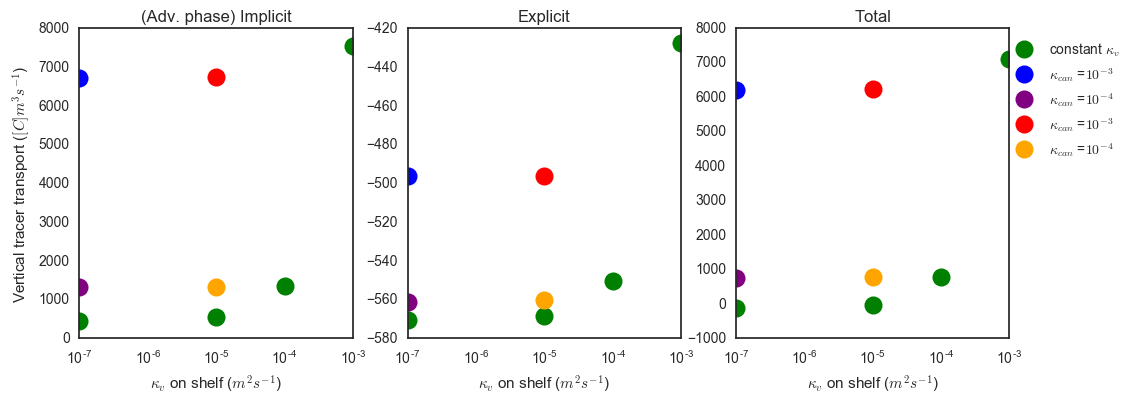

In [30]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list_Im = [diff_ImVert_flux61,diff_ImVert_flux38 ,diff_ImVert_flux62 ,diff_ImVert_flux63 ,
             diff_ImVert_flux043DDiff,diff_ImVert_flux053DDiff ,
             diff_ImVert_flux063DDiff,diff_ImVert_flux073DDiff ,
             ]

trans_list_Ex = [diff_ExVert_flux61,diff_ExVert_flux38 ,diff_ExVert_flux62 ,diff_ExVert_flux63 ,
             diff_ExVert_flux043DDiff,diff_ExVert_flux053DDiff ,
             diff_ExVert_flux063DDiff,diff_ExVert_flux073DDiff ,
             ]

fig,ax = plt.subplots(1,3,figsize=(12,4))
for transIm,transEx,lab,color,kv_num in zip(trans_list_Im,trans_list_Ex,labels,colors,kv):
    ax[0].plot(kv_num,transIm[6:].mean(),'o',color=color,label=lab, markersize=13)
    ax[1].plot(kv_num,transEx[6:].mean(),'o',color=color,label=lab, markersize=13)
    ax[2].plot(kv_num,(transEx[6:]+transIm[6:]).mean(),'o',color=color,label=lab, markersize=13)

ax[0].set_xscale("log", nonposx='clip')
ax[1].set_xscale("log", nonposx='clip')
ax[2].set_xscale("log", nonposx='clip')

ax[0].set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax[1].set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')
ax[2].set_xlabel('$\kappa_v$ on shelf ($m^2s^{-1}$)')

ax[0].set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax[0].set_title('(Adv. phase) Implicit')
ax[1].set_title('Explicit')
ax[2].set_title('Total')

ax[2].legend(loc='upper right', bbox_to_anchor=(1.45, 1))
fig.savefig('diff_Vert_transport_canyon_diffusivity_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


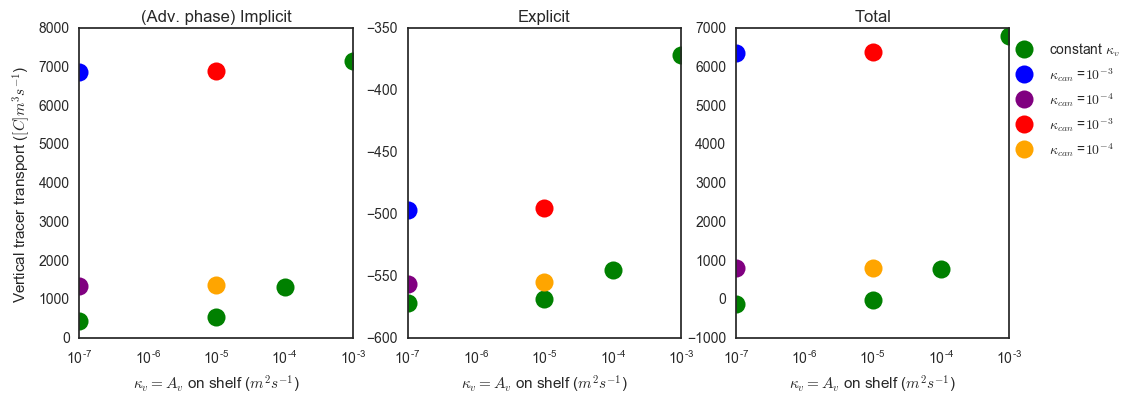

In [31]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

labels = ['','','','constant $\kappa_v$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$',
          '$\kappa_{can}$ =$10^{-3}$',
          '$\kappa_{can}$ =$10^{-4}$'
         ]

colors = ['green','green','green','green','blue','purple','red','orange']

kv = [1E-7,1E-5,1E-4,1E-3,1E-7,1E-7,1E-5,1E-5]

trans_list_Im = [diff_ImVert_flux43,diff_ImVert_flux38 ,diff_ImVert_flux37 ,diff_ImVert_flux36 ,
             diff_ImVert_flux013D,diff_ImVert_flux023D ,
             diff_ImVert_flux033D,diff_ImVert_flux043D ,
             ]

trans_list_Ex = [diff_ExVert_flux43,diff_ExVert_flux38 ,diff_ExVert_flux37 ,diff_ExVert_flux36 ,
             diff_ExVert_flux013D,diff_ExVert_flux023D ,
             diff_ExVert_flux033D,diff_ExVert_flux043D ,
             ]

fig,ax = plt.subplots(1,3,figsize=(12,4))
for transIm,transEx,lab,color,kv_num in zip(trans_list_Im,trans_list_Ex,labels,colors,kv):
    ax[0].plot(kv_num,transIm[6:].mean(),'o',color=color,label=lab, markersize=13)
    ax[1].plot(kv_num,transEx[6:].mean(),'o',color=color,label=lab, markersize=13)
    ax[2].plot(kv_num,(transEx[6:]+transIm[6:]).mean(),'o',color=color,label=lab, markersize=13)

ax[0].set_xscale("log", nonposx='clip')
ax[1].set_xscale("log", nonposx='clip')
ax[2].set_xscale("log", nonposx='clip')

ax[0].set_xlabel('$\kappa_v=A_v$ on shelf ($m^2s^{-1}$)')
ax[1].set_xlabel('$\kappa_v=A_v$ on shelf ($m^2s^{-1}$)')
ax[2].set_xlabel('$\kappa_v=A_v$ on shelf ($m^2s^{-1}$)')

ax[0].set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax[0].set_title('(Adv. phase) Implicit')
ax[1].set_title('Explicit')
ax[2].set_title('Total')

ax[2].legend(loc='upper right', bbox_to_anchor=(1.45, 1))
fig.savefig('diff_Vert_transport_canyon_Kv_and_Av.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


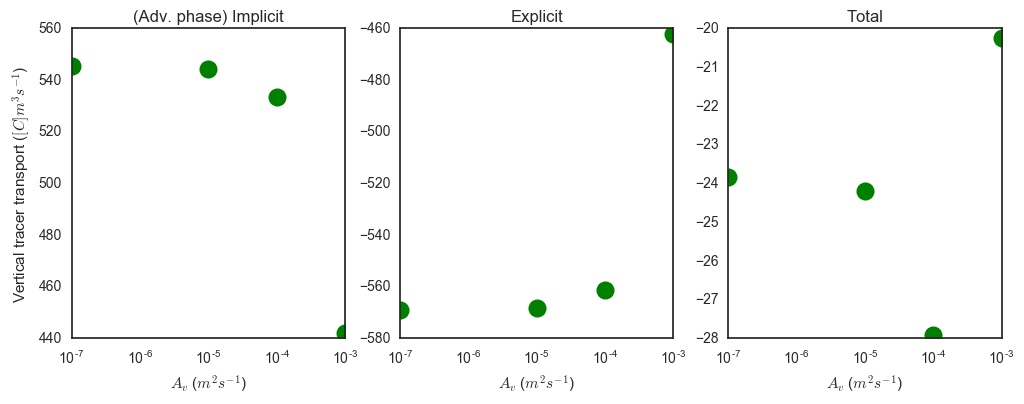

In [32]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

Av = [1E-7,1E-5,1E-4,1E-3]

trans_list_Im = [diff_ImVert_flux55,diff_ImVert_flux38 ,diff_ImVert_flux56 ,diff_ImVert_flux57 ,
                ]

trans_list_Ex = [diff_ExVert_flux55,diff_ExVert_flux38 ,diff_ExVert_flux56 ,diff_ExVert_flux57 ,
                ]
 
fig,ax = plt.subplots(1,3,figsize=(12,4))
for transIm,transEx,kv_num in zip(trans_list_Im,trans_list_Ex,Av):
    ax[0].plot(kv_num,transIm[6:].mean(),'go', markersize=13)
    ax[1].plot(kv_num,transEx[6:].mean(),'go', markersize=13)
    ax[2].plot(kv_num,(transEx[6:]+transIm[6:]).mean(),'go', markersize=13)

ax[0].set_xscale("log", nonposx='clip')
ax[1].set_xscale("log", nonposx='clip')
ax[2].set_xscale("log", nonposx='clip')

ax[0].set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax[1].set_xlabel('$A_v$ ($m^2s^{-1}$)')
ax[2].set_xlabel('$A_v$ ($m^2s^{-1}$)')

ax[0].set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax[0].set_title('(Adv. phase) Implicit')
ax[1].set_title('Explicit')
ax[2].set_title('Total')

ax[2].legend(loc='upper right', bbox_to_anchor=(1.45, 1))
fig.savefig('diff_Vert_transport_canyon_Av_only.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')


/home/kramosmu/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


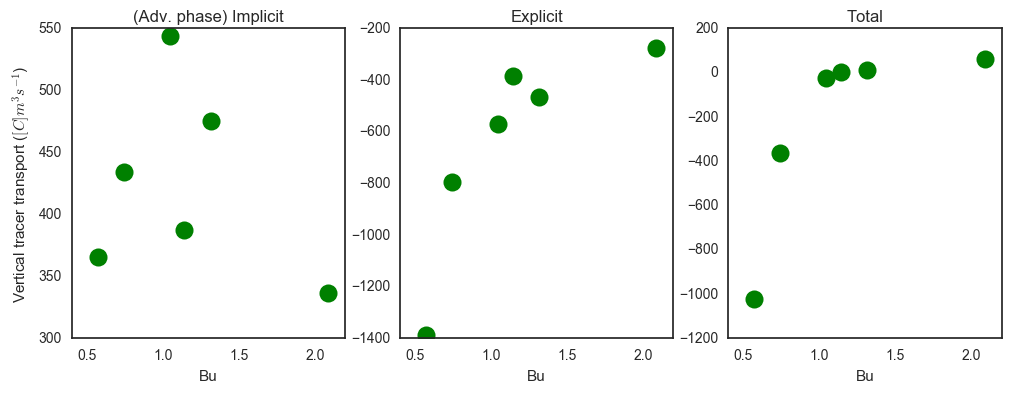

In [34]:
sns.set_context('notebook')
sns.set_style('white')

sns.set_palette('Set1',9)

Hs = 152.5 # m
W = 8300.0 # m
N = np.array([5.5E-3,
              3.9E-3,
              6.0E-3,
              3.0E-3,
              5.5E-3,
              5.5E-3])

f = np.array([9.66E-5,
              9.66E-5,
              9.66E-5,
              9.66E-5,
              7.68E-5,
              4.84E-5])

Bu = (N*Hs)/(f*W)

trans_list_Im = [diff_ImVert_flux38 ,
                 diff_ImVert_flux44,
                 diff_ImVert_flux45,
                 diff_ImVert_flux46 ,
                 diff_ImVert_flux51 ,
                 diff_ImVert_flux52 ,
                ]

trans_list_Ex = [diff_ExVert_flux38 ,
                 diff_ExVert_flux44,
                 diff_ExVert_flux45,
                 diff_ExVert_flux46 ,
                 diff_ExVert_flux51 ,
                 diff_ExVert_flux52 ,
                ]
 
fig,ax = plt.subplots(1,3,figsize=(12,4))
for transIm,transEx,kv_num in zip(trans_list_Im,trans_list_Ex,Bu):
    ax[0].plot(kv_num,transIm[6:].mean(),'go', markersize=13)
    ax[1].plot(kv_num,transEx[6:].mean(),'go', markersize=13)
    ax[2].plot(kv_num,(transEx[6:]+transIm[6:]).mean(),'go', markersize=13)


ax[0].set_xlabel('Bu')
ax[1].set_xlabel('Bu')
ax[2].set_xlabel('Bu')

ax[0].set_ylabel('Vertical tracer transport ($[C]m^3s^{-1}$)')
ax[0].set_title('(Adv. phase) Implicit')
ax[1].set_title('Explicit')
ax[2].set_title('Total')

ax[2].legend(loc='upper right', bbox_to_anchor=(1.45, 1))
fig.savefig('diff_Vert_transport_canyon_Bu.eps',format='eps',transparent=True,frameon=False,bbox_inches='tight')
